In [28]:
using LowLevelFEM
using LinearAlgebra
using Tensors
using Plots

In [29]:
function square_mesh(; lx=1.0, ly=1.0, n=10, dx=lx / n, dy=ly / n, order=1)

    gmsh.option.setNumber("General.Verbosity", 0)

    # --------------------------------------------------
    # Geometry
    # --------------------------------------------------
    # Box: origin (0,0,0), size l x l x l
    box = gmsh.model.occ.addRectangle(0.0, 0.0, 0.0, lx, ly)

    gmsh.model.occ.synchronize()
    #return

    # --------------------------------------------------
    # Physical groups
    # --------------------------------------------------
    gmsh.model.addPhysicalGroup(1, [1], -1, "bottom")
    gmsh.model.addPhysicalGroup(1, [2], -1, "right")
    gmsh.model.addPhysicalGroup(1, [3], -1, "top")
    gmsh.model.addPhysicalGroup(1, [4], -1, "left")

    gmsh.model.addPhysicalGroup(2, [1], -1, "surface")

    gmsh.model.addPhysicalGroup(0, [1], -1, "leftbottom")
    gmsh.model.addPhysicalGroup(0, [2], -1, "rightbottom")
    gmsh.model.addPhysicalGroup(0, [3], -1, "righttop")
    gmsh.model.addPhysicalGroup(0, [4], -1, "lefttop")

    # --------------------------------------------------
    # Mesh settings (structured hex mesh)
    # --------------------------------------------------
    #gmsh.option.setNumber("Mesh.Algorithm3D", 1)      # Delaunay for recombination
    gmsh.option.setNumber("Mesh.RecombineAll", 1)
    #gmsh.option.setNumber("Mesh.RecombinationAlgorithm", 1)

    #gmsh.option.setNumber("Mesh.SubdivisionAlgorithm", 1)

    d = min(dx, dy)

    gmsh.model.mesh.setTransfiniteCurve(1, ceil(lx / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(3, ceil(lx / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(2, ceil(ly / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(4, ceil(ly / d) + 1)

    gmsh.model.mesh.setTransfiniteSurface(1)

    gmsh.option.setNumber("Mesh.ElementOrder", order)

    # Characteristic length control
    #lc = min(dx, dy)
    #gmsh.option.setNumber("Mesh.CharacteristicLengthMin", lc)
    #gmsh.option.setNumber("Mesh.CharacteristicLengthMax", lc)

    # --------------------------------------------------
    # Generate mesh
    # --------------------------------------------------
    gmsh.model.mesh.generate(2)

    # --------------------------------------------------
    # Save
    # --------------------------------------------------
    #gmsh.write("cube.msh")

    #gmsh.finalize()

    return nothing
end


square_mesh (generic function with 1 method)

In [30]:
function cube_mesh(; lx=1.0, ly=1.0, lz=1.0, n=10, dx=lx / n, dy=ly / n, dz=lz / n, order=1)

    gmsh.option.setNumber("General.Verbosity", 0)

    # --------------------------------------------------
    # Geometry
    # --------------------------------------------------
    # Box: origin (0,0,0), size l x l x l
    box = gmsh.model.occ.addBox(0.0, 0.0, 0.0, lx, ly, lz)

    gmsh.model.occ.synchronize()
    #return

    # --------------------------------------------------
    # Physical groups
    # --------------------------------------------------
    gmsh.model.addPhysicalGroup(2, [1], -1, "left")
    gmsh.model.addPhysicalGroup(2, [2], -1, "right")
    gmsh.model.addPhysicalGroup(2, [6], -1, "front")
    gmsh.model.addPhysicalGroup(2, [5], -1, "rear")
    gmsh.model.addPhysicalGroup(2, [3], -1, "bottom")
    gmsh.model.addPhysicalGroup(2, [4], -1, "top")

    gmsh.model.addPhysicalGroup(3, [1], -1, "volume")

    # --------------------------------------------------
    # Mesh settings (structured hex mesh)
    # --------------------------------------------------
    #gmsh.option.setNumber("Mesh.Algorithm3D", 1)      # Delaunay for recombination
    gmsh.option.setNumber("Mesh.RecombineAll", 1)
    #gmsh.option.setNumber("Mesh.RecombinationAlgorithm", 1)

    #gmsh.option.setNumber("Mesh.SubdivisionAlgorithm", 1)

    d = min(dx, dy)

    gmsh.model.mesh.setTransfiniteCurve(9, ceil(lx / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(10, ceil(lx / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(11, ceil(lx / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(12, ceil(lx / d) + 1)

    gmsh.model.mesh.setTransfiniteCurve(2, ceil(ly / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(4, ceil(ly / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(6, ceil(ly / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(8, ceil(ly / d) + 1)

    gmsh.model.mesh.setTransfiniteCurve(1, ceil(lz / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(3, ceil(lz / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(5, ceil(lz / d) + 1)
    gmsh.model.mesh.setTransfiniteCurve(7, ceil(lz / d) + 1)

    gmsh.model.mesh.setTransfiniteSurface(1)
    gmsh.model.mesh.setTransfiniteSurface(2)
    gmsh.model.mesh.setTransfiniteSurface(3)
    gmsh.model.mesh.setTransfiniteSurface(4)
    gmsh.model.mesh.setTransfiniteSurface(5)
    gmsh.model.mesh.setTransfiniteSurface(6)

    gmsh.model.mesh.setTransfiniteVolume(1)

    #gmsh.model.mesh.setTransfiniteAutomatic()

    gmsh.option.setNumber("Mesh.ElementOrder", order)

    # Characteristic length control
    #lc = min(dx, dy, dz)
    #gmsh.option.setNumber("Mesh.CharacteristicLengthMin", lc)
    #gmsh.option.setNumber("Mesh.CharacteristicLengthMax", lc)

    # --------------------------------------------------
    # Generate mesh
    # --------------------------------------------------
    gmsh.model.mesh.generate(3)

    # --------------------------------------------------
    # Save
    # --------------------------------------------------
    #gmsh.write("cube.msh")

    #gmsh.finalize()

    return nothing
end


cube_mesh (generic function with 1 method)

In [31]:
gmsh.initialize()

In [32]:
cube_mesh(lx=10, n=4, order=1)

In [33]:
openPreProcessor()

In [34]:
mat = Material("volume", E=2e2, ν=0.49)
prob = Problem([mat], type=:VectorField);

In [35]:
suppX = BoundaryCondition("left", ux=0, uy=0, uz=0)

load = BoundaryCondition("right", fy=(x, y, z) -> -(z - 0.5) * 1, fz=(x, y, z) -> (y - 0.5) * 1)

BoundaryCondition("right", nothing, nothing, nothing, nothing, nothing, nothing, nothing, var"#27#28"(), var"#29#30"(), nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing)

In [36]:
f_ext = loadVector(prob, [load])

showDoFResults(f_ext, name="load");

In [37]:
μ = mat.μ
λ = mat.λ
κ = mat.κ

p = (μ=μ, λ=λ, κ=κ);

In [38]:
u = vectorField(prob, "volume", [0, 0, 0]);

In [39]:
F = tensorField(prob, "volume", [1 0 0; 0 1 0; 0 0 1])

I = unitTensor(F)

C = F' * F;

In [40]:
function ψ_StVenantKirchhoff(C, p)
    λ = p.λ
    μ = p.μ

    I = [1.0 0 0; 0 1 0; 0 0 1]

    E = (C - I) / 2

    return (λ * tr(E)^2 + 2μ * dot(E, E)) / 2
end


ψ_StVenantKirchhoff (generic function with 1 method)

In [41]:
function ψ_NeoHooke(C, p)
    μ = p.μ
    κ = p.κ

    I = [1.0 0 0; 0 1 0; 0 0 1]
    C_I = tr(C)
    C_III = det(C)
    J = √C_III

    return μ / 2 * (C_I / (C_III^(1 / 3)) - 3) + κ / 2 * log(J)^2
    #return μ / 2 * (C_I / (C_III^(1 / 3)) - 3) + κ / 2 * (J - 1)^2
end


ψ_NeoHooke (generic function with 1 method)

In [42]:
#ψ = ψ_StVenantKirchhoff
ψ = ψ_NeoHooke

ψ_NeoHooke (generic function with 1 method)

In [43]:
S = IIPiolaKirchhoff(ψ, C, p)

P = F * S;

## Innen indul az iteráció

In [44]:
loadSteps = 10
iterationSteps = 20

λ = 0.0
Δλ = 1.0 / loadSteps
Δλ_min = 1e-4
Δλ_max = 2.0 / loadSteps
err_limit = 1e-3
Δu = nothing
nstep = nothing
ε = Float64[]
uu = VectorField[]

push!(uu, u)

i = 1
while λ < 1.0
    u_old = copy(u)
    F_old = copy(F)
    C_old = copy(C)

    λ_trial = min(λ + Δλ, 1.0)

    converged = false
    err = 1e10
    err_prev = Inf

    print(i, ": ", round(λ_trial * 100, digits=2), "%-(")
    j = 0
    while err < 10 * err_prev && j < iterationSteps
        j += 1
        print(j)
        sc = 10
        load = BoundaryCondition("right", fy=(x, y, z) -> -(z - 0.5) * sc * λ_trial, fz=(x, y, z) -> (y - 0.5) * sc * λ_trial)

        Kmat = materialTangentMatrix(prob, F=F, energy=ψ, params=p)
        Kgeo = initialStressMatrix(prob, energy=ψ, params=p, C=C)
        Kint = Kmat + Kgeo

        Fright = nodesToElements(elementsToNodes(F), onPhysicalGroup="right")
        Kext = externalTangentFollower(prob, [load], F=Fright)
        K = Kint - Kext

        f_int = internalForceVector(prob, energy=ψ, params=p, F=F)
        f_ext = loadVector(prob, [load], F=Fright)
        f = f_ext - f_int

        Δu = solveField(K, f, support=[suppX])

        u += Δu
        F = I + u ∘ ∇
        C = F' * F
        S = IIPiolaKirchhoff(ψ, C, p)
        P = F * S

        err = norm(DoFs(Δu)[:, 1]) / max(norm(DoFs(u)[:, 1]), 1e-12)

        push!(ε, err)

        if err < err_limit
            converged = true
            println(")✓")
            i += 1
            nstep = i
            break
        end

        if err > err_prev
            break
        end

        print(",")

        err_prev = err
    end
    if converged
        λ = λ_trial
        push!(uu, u)
        Δλ = min(1.1 * Δλ, Δλ_max)
    else
        u = copy(u_old)
        F = copy(F_old)
        C = copy(C_old)
        Δλ /= 1.3
        Δλ = clamp(Δλ, Δλ_min, Δλ_max)
        println(")↯")
    end
end
println()

1: 10.0%-(1,2,3,4,5,6)↯
1: 7.69%-(1,2,3,4,5)✓
2: 16.15%-(1,2,3)↯
2: 14.2%-(1,2,3)↯
2: 12.7%-(1,2,3)↯
2: 11.54%-(1,2,3)↯
2: 10.65%-(1,2,3)↯
2: 9.97%-(1,2,3)↯
2: 9.45%-(1,2,3)↯
2: 9.04%-(1,2,3)↯
2: 8.73%-(1,2,3)↯
2: 8.49%-(1,2,3)↯
2: 8.31%-(1,2,3)↯
2: 8.16%-(1,2,3,4)✓
3: 8.68%-(1,2,3,4)✓
4: 9.26%-(1,2,3,4)✓
5: 9.88%-(1,2,3)↯
5: 9.74%-(1,2,3,4)✓
6: 10.27%-(1,2,3,4)✓
7: 10.86%-(1,2,3,4)✓
8: 11.5%-(1,2,3)↯
8: 11.35%-(1,2,3,4)✓
9: 11.89%-(1,2,3,4,5)✓
10: 12.49%-(1,2,3,4,5)✓
11: 13.15%-(1,2,3,4,5)✓
12: 13.88%-(1,2,3)↯
12: 13.71%-(1,2,3,4,5)✓
13: 14.32%-(1,2,3,4,5)✓
14: 15.0%-(1,2,3,4,5)✓
15: 15.74%-(1,2,3,4,5)✓
16: 16.56%-(1,2,3)↯
16: 16.37%-(1,2,3,4,5)✓
17: 17.06%-(1,2,3,4,5)✓
18: 17.82%-(1,2,3,4,5,6)✓
19: 18.65%-(1,2,3,4,5,6)✓
20: 19.57%-(1,2,3)↯
20: 19.36%-(1,2,3,4,5,6)✓
21: 20.14%-(1,2,3,4,5,6)✓
22: 20.99%-(1,2,3,4,5,6)✓
23: 21.93%-(1,2,3,4,5,6,7)✓
24: 22.97%-(1,2,3,4,5,6,7)✓
25: 24.11%-(1,2,3)↯
25: 23.84%-(1,2,3,4,5,6,7)✓
26: 24.81%-(1,2,3,4,5,6,7)✓
27: 25.87%-(1,2,3,4,5,6,7)✓
28: 27.03%

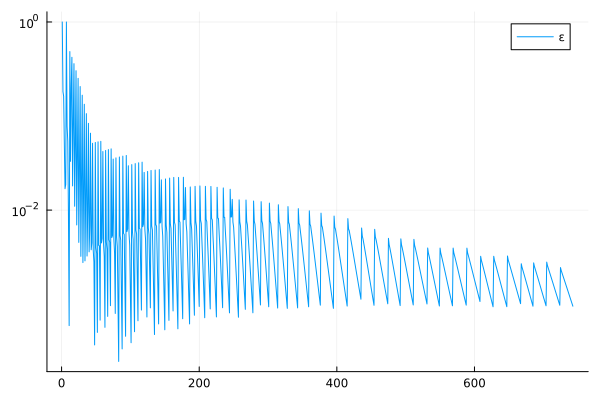

In [45]:
plot(ε, yscale=:log10, label="ε")

In [46]:
u = mergeFields(uu);

In [47]:
showDoFResults(u, name="u", visible=true);

In [48]:
I = ScalarField(prob, "volume", 1.0, steps=nstep)
O = ScalarField(prob, "volume", 0.0, steps=nstep)
I = TensorField([I O O; O I O; O O I])
F = I + u ∘ ∇
C = F' * F
S = IIPiolaKirchhoff(ψ, C, p);

In [49]:
showDoFResults(S, name="II P-K");

In [50]:
openPostProcessor()

In [51]:
saveField("u", u)

In [52]:
gmsh.finalize()